In [62]:
from sympy.solvers import solve
from sympy import Symbol
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

# Setting fundamental constant values. 
## Our test-cosmology is given by h=0.7, $\Omega_b=0.05$, $\Omega_c=0.25$, $\Omega_\Lambda=0.70$.

In [212]:
# conversion factor
cf=6.242e+18 # 1J to eV

# Fundamental constants
m_e = 9.10938e-31 #kg
c = 3*10**8 #m/s
E_e = m_e * c ** 2 * cf # in eV
pi = 3.14159265359
k_B = 1.38064852*10**(-23) # J/K
epsilon_0 = 13.6 # eV
epsilon_0_J = 13.6/cf # eV
T_CMB = 2.725 # K
alpha = 1/137 # fine-structure constant
hbar = 6.626070150*10**(-34)/2/pi # J*s
E_CMB = k_B * T_CMB # thermal energy of CMB today
H_0 = 70 # Hubble constant (km/s/Mpc)
Mpc = 3.086e+19 # Mpc to km
H_0_units = H_0/Mpc
omega_b=0.05
omega_c=0.25
omega_l=0.70

# Solving for $X_e$ coming from Saha equation

In [101]:
X = Symbol('X_e', positive=True)
kT=np.arange(0.1,0.5,0.005)
length=int((0.5-0.1)/0.005)
X_e_saha=np.empty(0)
index=0
for i in kT:
    result=np.array(solve(X*X/(1-X) - 10**9 * (E_e/(2*pi*i))**(3/2) * np.exp(-epsilon_0/i), X))
    X_e_saha = np.append(X_e_saha, result, axis=0)

# Solving for $X_e$ coming from Boltzmann equation

In [213]:
from scipy.integrate import odeint

constants = 9.78*alpha**2*(hbar**2 / (m_e**2 * c))
etab = 2.75*10**(-8)*omega_b*(0.7)**2

# function that returns dy/dt
def model(y,z): # y is X_e
    dydz = - constants*(epsilon_0_J/E_CMB/(1+z))**(1/2)*np.log(epsilon_0_J/E_CMB/(1+z)) * ((1-y)*(m_e*E_CMB*(1+z)/(2*pi*hbar**2))**(3/2)* np.exp(-epsilon_0_J/(E_CMB*(1+z))) - y**2 *2*etab*(E_CMB*(1+z))**3/(pi**2*hbar**3*c**3) )/(1+z)/(np.sqrt((omega_b+omega_c)*(1+z)**3+omega_l)*H_0_units)
    return dydz

# initial condition
y0 = 1
#y02=1

# time points
z = np.linspace(2500,500) # 2500 because at very high redshift we expect X_e=1
z0 = np.linspace(500,1800) # actual redshift array for plotting
#z2 = np.linspace(1800,500)

# solve ODE
y = odeint(model,y0,z)
X_e_boltzmann=y

# converting our redshift array into a thermal energy array (just for plots comparison)
kT_2 = E_CMB * (1+z)
# converting from Joules to electron-volts
kT_2 = kT_2*cf

# Comparing both solutions by plotting

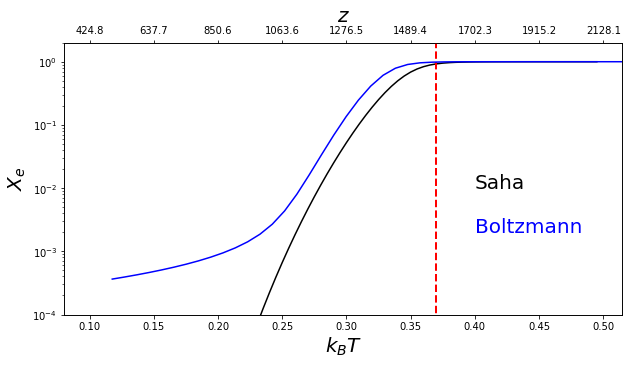

In [217]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

l1=ax1.semilogy(kT, X_e_saha, color='k')
l2=ax2.semilogy(kT_2, X_e_boltzmann, color='b')

ax2.set_xlim(0.1,0.5)
ax2.set_ylim(0.0001,2)
ax1.set_xlabel('$k_B T$',fontsize=20)
ax1.set_ylabel('$X_e$',fontsize=20)

new_tick_locations = np.array([0.1, .15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])

def tick_function(X):
    V = X/E_CMB/cf -1
    return ["%.1f" % z for z in V]

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tick_function(new_tick_locations))
ax2.set_xlabel('$z$',fontsize=20)

plt.text(0.4, 0.01,"Saha", fontsize=20, color='k')
plt.text(0.4, 0.002,"Boltzmann", fontsize=20, color='b')

plt.vlines(x=0.37, ymin=0, ymax=2, colors='r', linestyles='--', lw=2) #horizontal line for 1e-3

plt.savefig("Saha-Boltzmann_DE.pdf", dpi=300, bbox_inches='tight')